# Import and clean up of the control variables for my model

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sidetable

In [2]:
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/control variables/')

'/Users/NatStrom'

In [3]:
#import the ingester extension functions
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

import viewser
from viewser import Queryset, Column
from views_transformation_library import utilities

import ingester3
from ingester3.Country import Country

In [4]:
def nullcounts(ser):
    return ser.isnull().sum()

def custom_describe(frame, func=[nullcounts, 'sum', 'mean', 'median', 'max'],
                    numeric_only=True, **kwargs):
    if numeric_only:
        frame = frame.select_dtypes(include=np.number)
    return frame.agg(func, **kwargs)

## 1. WDI indicator

In [5]:
data_age = pd.read_csv('pop0014.csv',skiprows= 4)
data_gdp = pd.read_csv('gdp_pcap.csv',skiprows=4)
data_xpd_gdp = pd.read_csv('gov_exp_gdp.csv')

In [6]:
display(data_age.columns)
display(data_xpd_gdp.columns)
display(data_gdp.columns)
display(data_age)
display(data_xpd_gdp)
display(data_gdp)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

Index(['Entity', 'Code', 'Year', 'Expense (% of GDP)'], dtype='object')

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.131043,42.949419,42.852732,42.661157,42.359159,41.936664,...,19.348756,19.045505,18.799607,18.571721,18.334859,18.069771,17.767339,17.351022,16.799407,NaN
1,Africa Eastern and Southern,AFE,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,44.200016,44.285569,44.381992,44.495098,44.609810,44.728859,...,42.933695,42.777344,42.594171,42.424004,42.255261,42.052786,41.832100,41.598115,41.362739,NaN
2,Afghanistan,AFG,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.627186,41.695303,41.769167,41.885377,42.059389,42.314133,...,46.867621,46.231538,45.792106,45.520967,45.118616,44.708445,44.291352,43.807912,43.424543,NaN
3,Africa Western and Central,AFW,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,41.322373,41.417194,41.529034,41.696118,41.944426,42.168576,...,44.266677,44.231527,44.155163,44.042022,43.893535,43.721214,43.531411,43.319347,43.095027,NaN
4,Angola,AGO,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.236698,42.728464,43.256801,43.811211,44.416202,44.971958,...,45.756383,45.764164,45.759548,45.718586,45.641093,45.545945,45.425588,45.306602,45.179105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,43.933394,44.370671,44.687577,44.819432,44.700448,44.401636,...,26.690248,26.485297,25.964487,25.162776,24.434338,23.816523,23.247349,22.638645,22.001860,NaN
262,"Yemen, Rep.",YEM,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,40.736166,40.747765,40.773133,40.875174,41.072802,41.368906,...,42.375582,42.027499,41.702829,41.407766,41.118413,40.820397,40.503437,40.188908,39.872107,NaN
263,South Africa,ZAF,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,42.452166,42.301710,42.224522,42.123209,42.075672,42.097008,...,28.423750,28.394889,28.275352,28.365854,28.586096,28.681530,28.745269,28.739672,28.672962,NaN
264,Zambia,ZMB,Population ages 0-14 (% of total population),SP.POP.0014.TO.ZS,46.099247,46.303423,46.517781,46.773843,47.037066,47.253934,...,46.039495,45.789022,45.500445,45.189872,44.857299,44.496183,44.099904,43.680373,43.262363,NaN


,Entity,Code,Year,Expense (% of GDP)
0,Afghanistan,AFG,2006,20.578175
1,Afghanistan,AFG,2007,24.243259
2,Afghanistan,AFG,2008,50.719299
3,Afghanistan,AFG,2009,44.317841
4,Afghanistan,AFG,2010,50.863003
...,...,...,...,...
4034,Zimbabwe,ZWE,2012,20.211826
4035,Zimbabwe,ZWE,2015,21.809416
4036,Zimbabwe,ZWE,2016,25.236347
4037,Zimbabwe,ZWE,2017,28.413719


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26515.678080,26942.307976,28421.386493,28451.273745,29326.708058,30220.594523,31650.760537,24487.863560,29342.100858,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.913034,162.551683,172.002460,199.189238,179.387799,198.230368,...,1730.394686,1719.183721,1538.552268,1443.692371,1628.586788,1564.734340,1512.270553,1363.540741,1549.772730,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,...,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,106.976475,112.047561,117.730633,122.278715,130.599963,137.186142,...,2149.295219,2243.271464,1876.623483,1645.023767,1585.911930,1731.311792,1749.303317,1683.436391,1757.030626,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1603.993477,1953.533757,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3704.784221,3902.676013,3520.766449,3759.560246,4009.380987,4384.048892,4416.108358,4310.811183,5269.783901,NaN
262,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1497.747941,1557.601406,1488.416482,1069.817122,893.716573,701.714878,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP per capita (current US$),NY.GDP.PCAP.CD,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.522211,6688.787271,5741.643129,7055.044776,NaN
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,228.567399,216.274674,208.562685,209.453362,236.941713,296.022427,...,1840.320553,1724.576220,1307.909649,1249.923143,1495.752138,1475.204538,1268.120941,956.831364,1137.343633,NaN


In [7]:
#stack, filter and rename the columns
##rename
data_age = data_age.rename(columns= {'Country Code':'iso'})
data_xpd_gdp = data_xpd_gdp.rename(columns= {'Code':'iso','Year':'year_id'})
data_gdp = data_gdp.rename(columns= {'Country Code':'iso'})
##filter the needed columns
data_age = data_age.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
data_gdp = data_gdp.drop(columns=['Country Name','Indicator Name', 'Indicator Code','Unnamed: 66'])
##stack the individual year columns
data_age = data_age.melt(id_vars='iso',var_name='year_id',value_name='age0014_value')
data_gdp = data_gdp.melt(id_vars='iso',var_name='year_id',value_name='gdp_pcap_value')

display(data_age)
display(data_xpd_gdp)
display(data_gdp)

,iso,year_id,age0014_value
0,ABW,1960,43.131043
1,AFE,1960,44.200016
2,AFG,1960,41.627186
3,AFW,1960,41.322373
4,AGO,1960,42.236698
...,...,...,...
16487,XKX,2021,22.001860
16488,YEM,2021,39.872107
16489,ZAF,2021,28.672962
16490,ZMB,2021,43.262363


,Entity,iso,year_id,Expense (% of GDP)
0,Afghanistan,AFG,2006,20.578175
1,Afghanistan,AFG,2007,24.243259
2,Afghanistan,AFG,2008,50.719299
3,Afghanistan,AFG,2009,44.317841
4,Afghanistan,AFG,2010,50.863003
...,...,...,...,...
4034,Zimbabwe,ZWE,2012,20.211826
4035,Zimbabwe,ZWE,2015,21.809416
4036,Zimbabwe,ZWE,2016,25.236347
4037,Zimbabwe,ZWE,2017,28.413719


,iso,year_id,gdp_pcap_value
0,ABW,1960,NaN
1,AFE,1960,162.913034
2,AFG,1960,62.369375
3,AFW,1960,106.976475
4,AGO,1960,NaN
...,...,...,...
16487,XKX,2021,5269.783901
16488,YEM,2021,NaN
16489,ZAF,2021,7055.044776
16490,ZMB,2021,1137.343633


In [8]:
data_gdp['year_id'] = data_gdp['year_id'].astype(str).astype(int)
data_age['year_id'] = data_age['year_id'].astype(str).astype(int)

In [9]:
#merge them together
data_wdi = pd.merge(data_age,data_gdp, how="outer", on=["iso", "year_id"])
data_wdi = pd.merge(data_wdi,data_xpd_gdp, how="outer", on=["iso", "year_id"])
display(data_wdi)

,iso,year_id,age0014_value,gdp_pcap_value,Entity,Expense (% of GDP)
0,ABW,1960,43.131043,NaN,NaN,NaN
1,AFE,1960,44.200016,162.913034,NaN,NaN
2,AFG,1960,41.627186,62.369375,NaN,NaN
3,AFW,1960,41.322373,106.976475,NaN,NaN
4,AGO,1960,42.236698,NaN,NaN,NaN
...,...,...,...,...,...,...
16762,OWID_WRL,2015,NaN,NaN,World,27.578072
16763,OWID_WRL,2016,NaN,NaN,World,27.419537
16764,OWID_WRL,2017,NaN,NaN,World,27.349531
16765,OWID_WRL,2018,NaN,NaN,World,27.214636


In [49]:
## only years from 1980 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1990]

In [50]:
#create c_ids
data_wdi = pd.DataFrame.cy.soft_validate_iso_year(data_wdi, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_wdi.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_wdi = pd.DataFrame.cy.from_iso_year(data_wdi[data_wdi['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_wdi = data_wdi.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,c_id,year_id,age0014_value,gdp_pcap_value,Expense (% of GDP),valid_id
10,40,1990,47.040365,841.805414,0.0,False
11,40,1991,47.109437,858.087037,0.0,False
12,40,1992,46.985315,935.106141,0.0,False
13,40,1993,46.699672,1251.866347,0.0,False
14,40,1994,46.283378,1012.263391,0.0,False
...,...,...,...,...,...,...
1779,246,2017,46.024402,0.000000,0.0,False
1780,246,2018,46.849525,0.000000,0.0,False
1781,246,2019,46.375391,0.000000,0.0,False
1782,246,2020,45.497522,0.000000,0.0,False


countries with cy_id na below


,c_id,year_id,age0014_value,gdp_pcap_value,Expense (% of GDP),valid_id
10,40,1990,47.040365,841.805414,0.0,False
11,40,1991,47.109437,858.087037,0.0,False
12,40,1992,46.985315,935.106141,0.0,False
13,40,1993,46.699672,1251.866347,0.0,False
14,40,1994,46.283378,1012.263391,0.0,False
...,...,...,...,...,...,...
1779,246,2017,46.024402,0.000000,0.0,False
1780,246,2018,46.849525,0.000000,0.0,False
1781,246,2019,46.375391,0.000000,0.0,False
1782,246,2020,45.497522,0.000000,0.0,False


In [51]:
#group by country-year & only filter c_ids for Eastern SSa
data_wdi = data_wdi.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')
data_wdi = data_wdi.groupby(['c_id','year_id']).sum().reset_index()
display(data_wdi)

,c_id,year_id,age0014_value,gdp_pcap_value,Expense (% of GDP),valid_id


In [13]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wdi.columns:
    pct_missing= np.mean(data_wdi[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,c_id,0.0
1,year_id,0.0
2,age0014_value,0.0
3,gdp_pcap_value,0.0
4,Expense (% of GDP),0.0
5,valid_id,0.0


In [14]:
custom_describe(data_wdi)

,c_id,year_id,age0014_value,gdp_pcap_value,Expense (% of GDP),valid_id
nullcounts,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
sum,207660.000000,3.569571e+06,78389.488724,2.114298e+06,8418.694852,1784.0
mean,116.401345,2.000881e+03,43.940296,1.185145e+03,4.718999,1.0
median,81.000000,2.001000e+03,44.743775,5.854981e+02,0.000000,1.0
max,246.000000,2.021000e+03,51.801480,1.984972e+04,52.181412,1.0


In [16]:
display(data_wdi.stb.freq(['c_id','year_id'],value='age0014_value'))
display(data_wdi.stb.freq(['c_id','year_id'],value='gdp_pcap_value'))
display(data_wdi.stb.freq(['c_id','year_id'],value='Expense (% of GDP)'))

,c_id,year_id,age0014_value,percent,cumulative_age0014_value,cumulative_percent
0,237,1980,51.801480,0.066082,51.801480,0.066082
1,237,1981,51.570184,0.065787,103.371664,0.131869
2,237,1982,51.333545,0.065485,154.705208,0.197355
3,156,1995,51.180881,0.065290,205.886090,0.262645
4,237,1983,51.066702,0.065145,256.952791,0.327790
...,...,...,...,...,...,...
1779,40,2017,28.239821,0.036025,78280.505601,99.860972
1780,40,2018,27.864860,0.035547,78308.370462,99.896519
1781,40,2019,27.461720,0.035032,78335.832182,99.931551
1782,40,2020,27.043028,0.034498,78362.875210,99.966050


,c_id,year_id,gdp_pcap_value,percent,cumulative_gdp_pcap_value,cumulative_percent
0,76,2008,19849.717767,0.938833,1.984972e+04,0.938833
1,76,2012,18756.426423,0.887123,3.860614e+04,1.825956
2,76,2011,18659.417054,0.882535,5.726556e+04,2.708491
3,76,2013,17644.595162,0.834537,7.491016e+04,3.543028
4,76,2014,16804.925948,0.794823,9.171508e+04,4.337851
...,...,...,...,...,...,...
1676,156,1994,111.937304,0.005294,2.113893e+06,99.980836
1677,57,2002,110.460875,0.005224,2.114003e+06,99.986060
1678,120,1980,102.438851,0.004845,2.114106e+06,99.990905
1679,235,1981,98.595074,0.004663,2.114204e+06,99.995569


,c_id,year_id,Expense (% of GDP),percent,cumulative_Expense (% of GDP),cumulative_percent
0,160,2009,52.181412,0.619828,52.181412,0.619828
1,160,2008,46.492016,0.552247,98.673428,1.172075
2,160,2013,42.708435,0.507305,141.381863,1.679380
3,160,2010,42.541592,0.505323,183.923454,2.184703
4,160,2007,41.462448,0.492504,225.385902,2.677207
...,...,...,...,...,...,...
431,76,2006,3.686132,0.043785,8415.268273,99.959298
432,76,2007,3.426025,0.040695,8418.694298,99.999993
433,120,2019,0.000185,0.000002,8418.694483,99.999996
434,120,2017,0.000185,0.000002,8418.694668,99.999998


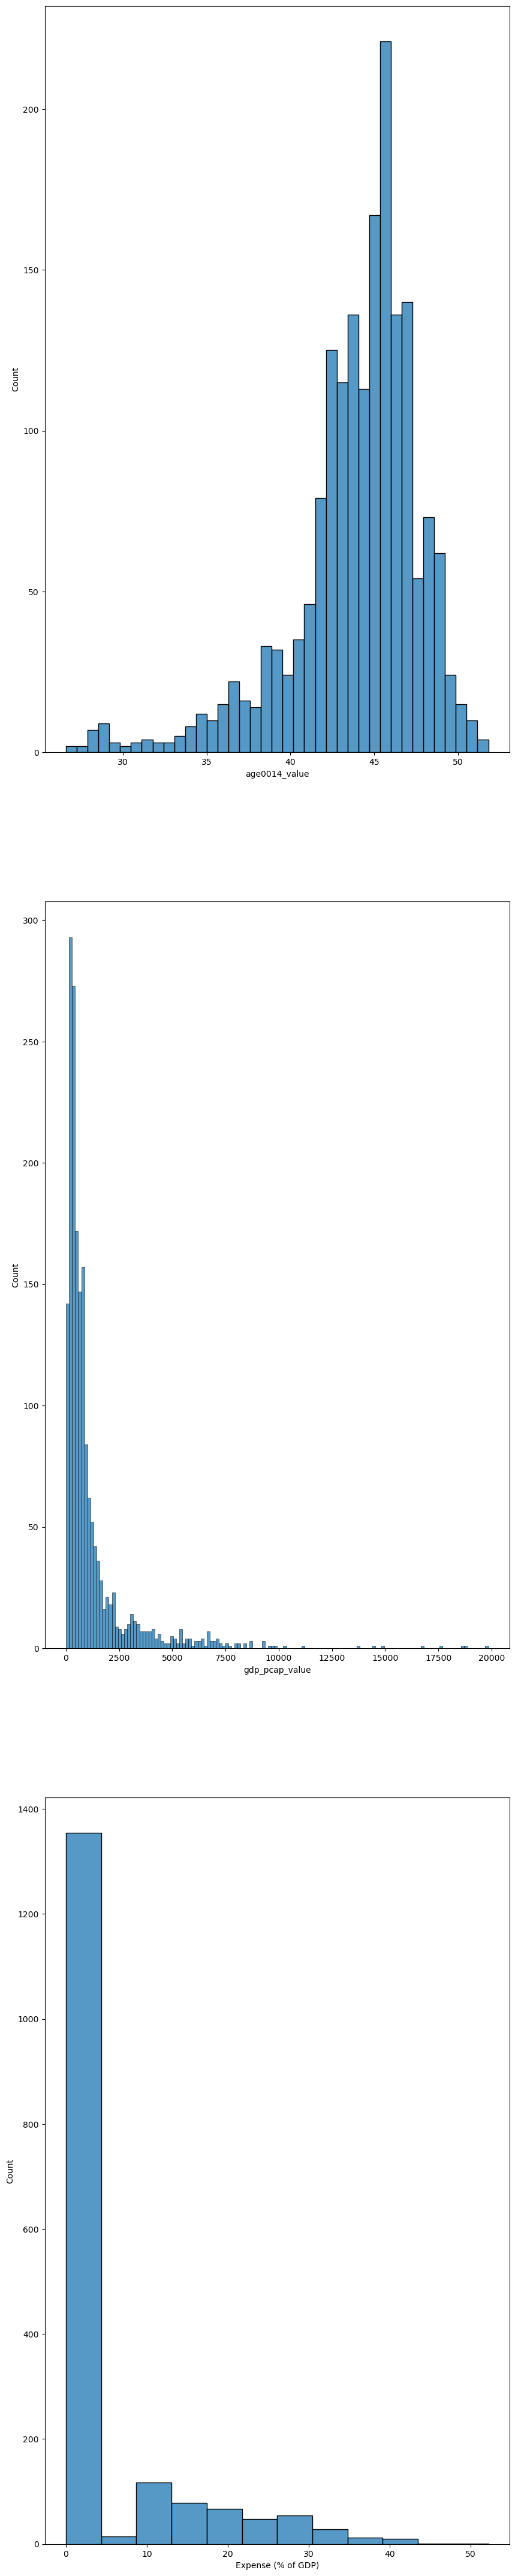

In [17]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(3,1,figsize=(10,55))
sns.histplot(data_wdi['age0014_value'],ax=axes[0])
sns.histplot(data_wdi['gdp_pcap_value'],ax=axes[1])
sns.histplot(data_wdi['Expense (% of GDP)'],ax=axes[2])
plt.savefig('wdi1.png')

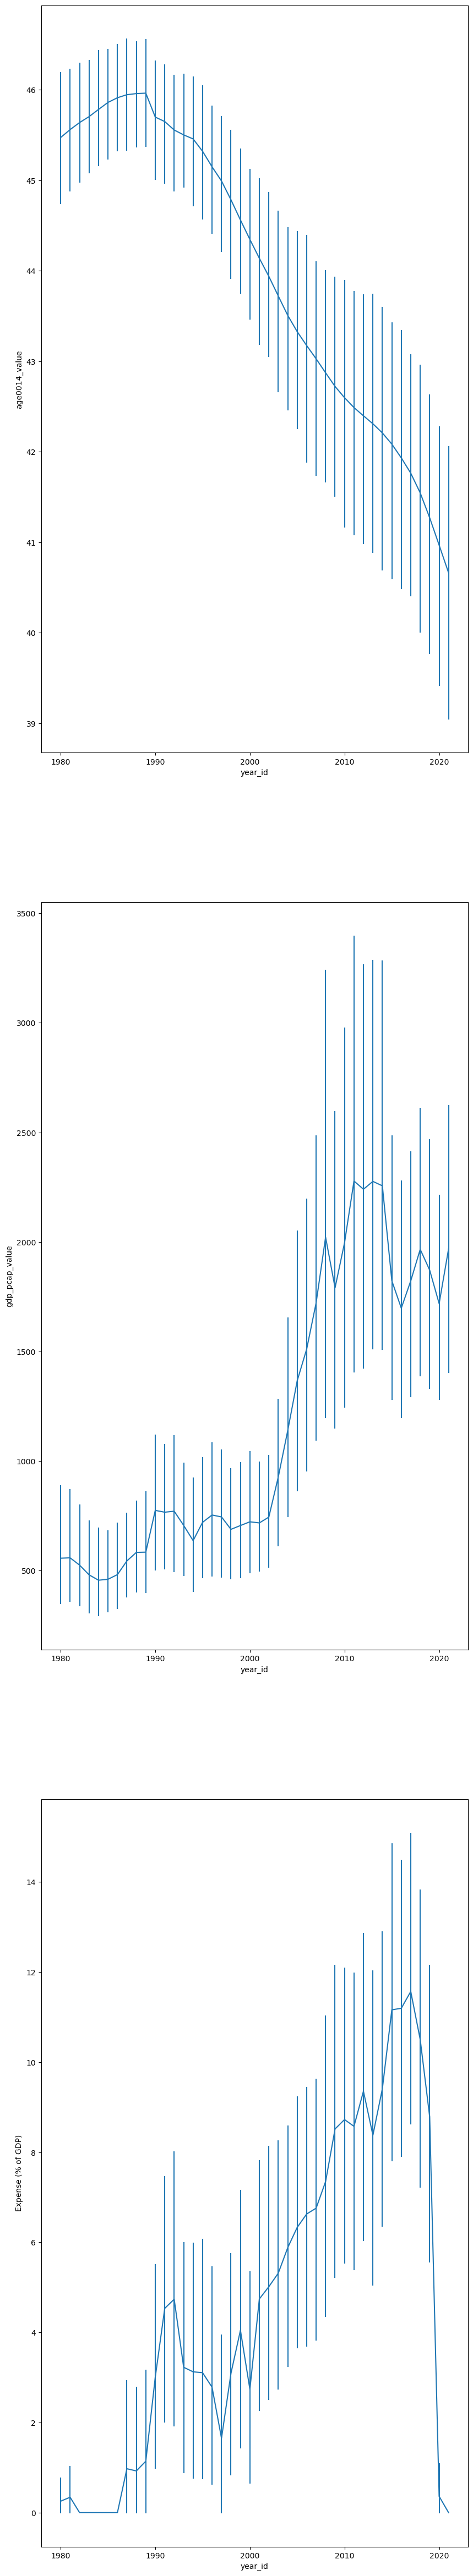

In [18]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='age0014_value',data=data_wdi,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdp_pcap_value',data=data_wdi,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='Expense (% of GDP)',data=data_wdi,err_style='bars',ax=axes[2])

plt.savefig('wdi2.png')

In [19]:
#save to csv
data_wdi.to_csv('data_wdi.csv')

## 2. Development assistance to health

In [20]:
#load data (already cleaned up)
data_dah = pd.read_csv('DAH.csv')
display(data_dah)

,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid
0,0,Afghanistan,1990,AFG,0,0,64005.0,0.0,0.0,0.0,0.0,0.0,0.0,193.0,0.0,63812.0
1,1,Afghanistan,1991,AFG,0,0,44222.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44131.0
2,2,Afghanistan,1992,AFG,1,0,18503.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17253.0
3,3,Afghanistan,1993,AFG,1,0,13531.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13521.0
4,4,Afghanistan,1994,AFG,1,0,2105.0,155.0,340.0,2.0,0.0,0.0,4.0,118.0,0.0,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,4512,Zimbabwe,2014,ZWE,87,0,366808.0,55318.0,46085.0,212254.0,34890.0,8450.0,573.0,799.0,0.0,6066.0
4513,4513,Zimbabwe,2015,ZWE,80,0,491662.0,53583.0,86006.0,294420.0,33059.0,13915.0,1239.0,1720.0,0.0,4014.0
4514,4514,Zimbabwe,2016,ZWE,89,0,385735.0,34939.0,52061.0,223305.0,38019.0,14030.0,524.0,1343.0,0.0,19902.0
4515,4515,Zimbabwe,2017,ZWE,75,27,436510.0,25122.0,122226.0,206333.0,39998.0,21187.0,2762.0,1907.0,0.0,14835.0


In [21]:
#add c_id
data_dah = pd.DataFrame.cy.soft_validate_iso_year(data_dah, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_dah.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_dah = pd.DataFrame.cy.from_iso_year(data_dah[data_dah['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_dah = data_dah.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,valid_id
116,116,Anguilla,1992,AIA,0,0,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1484.0,False
117,117,Anguilla,1993,AIA,0,0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,False
118,118,Anguilla,1994,AIA,0,0,294.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,False
119,119,Anguilla,1995,AIA,0,0,167.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,False
120,120,Anguilla,1998,AIA,0,0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,4425,Wallis and Futuna Islands,2014,WLF,4,0,918.0,1.0,744.0,0.0,0.0,0.0,18.0,88.0,0.0,49.0,False
4426,4426,Wallis and Futuna Islands,2015,WLF,3,0,280.0,115.0,85.0,0.0,0.0,0.0,26.0,3.0,0.0,41.0,False
4427,4427,Wallis and Futuna Islands,2016,WLF,2,0,7270.0,129.0,3049.0,0.0,0.0,0.0,49.0,0.0,0.0,3622.0,False
4428,4428,Wallis and Futuna Islands,2017,WLF,3,3,2490.0,90.0,1172.0,0.0,0.0,0.0,34.0,2.0,0.0,894.0,False


countries with cy_id na below


,Unnamed: 0,country,year_id,iso,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,valid_id
116,116,Anguilla,1992,AIA,0,0,1484.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1484.0,False
117,117,Anguilla,1993,AIA,0,0,537.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,537.0,False
118,118,Anguilla,1994,AIA,0,0,294.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,False
119,119,Anguilla,1995,AIA,0,0,167.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,False
120,120,Anguilla,1998,AIA,0,0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,4425,Wallis and Futuna Islands,2014,WLF,4,0,918.0,1.0,744.0,0.0,0.0,0.0,18.0,88.0,0.0,49.0,False
4426,4426,Wallis and Futuna Islands,2015,WLF,3,0,280.0,115.0,85.0,0.0,0.0,0.0,26.0,3.0,0.0,41.0,False
4427,4427,Wallis and Futuna Islands,2016,WLF,2,0,7270.0,129.0,3049.0,0.0,0.0,0.0,49.0,0.0,0.0,3622.0,False
4428,4428,Wallis and Futuna Islands,2017,WLF,3,3,2490.0,90.0,1172.0,0.0,0.0,0.0,34.0,2.0,0.0,894.0,False


In [22]:
data_dah = data_dah.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')

In [23]:
custom_describe(data_dah)

,Unnamed: 0,year_id,ihme_dah_elim_ch,ihme_dah_prelim_est,ihme_dah_total_aid,ihme_dah_rmh_aid,ihme_dah_nch_aid,ihme_dah_hiv_aid,ihme_dah_mal_aid,ihme_dah_tb_aid,ihme_dah_ncd_aid,ihme_dah_oid_aid,ihme_dah_unalloc_aid,ihme_dah_other_aid,c_id
nullcounts,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000
sum,2.627724e+06,2.493047e+06,50217.000000,2370.000000,1.521240e+08,1.558044e+07,2.159565e+07,5.612714e+07,1.489424e+07,4.486679e+06,718277.000000,6.264258e+06,0.0,2.017694e+07,144709.000000
mean,2.112318e+03,2.004057e+03,40.367363,1.905145,1.222862e+05,1.252447e+04,1.735985e+04,4.511828e+04,1.197286e+04,3.606655e+03,577.393087,5.035577e+03,0.0,1.621941e+04,116.325563
median,2.085500e+03,2.004000e+03,20.000000,0.000000,4.192900e+04,2.926500e+03,2.977500e+03,6.743500e+03,6.735000e+02,2.195000e+02,44.000000,9.325000e+02,0.0,7.554500e+03,81.000000
max,4.516000e+03,2.018000e+03,129.000000,36.000000,1.577709e+06,2.352610e+05,5.422260e+05,6.637850e+05,3.060600e+05,1.671940e+05,32493.000000,4.547380e+05,0.0,2.503840e+05,246.000000


In [24]:
data_dah.columns

Index(['Unnamed: 0', 'country', 'year_id', 'iso', 'ihme_dah_elim_ch',
       'ihme_dah_prelim_est', 'ihme_dah_total_aid', 'ihme_dah_rmh_aid',
       'ihme_dah_nch_aid', 'ihme_dah_hiv_aid', 'ihme_dah_mal_aid',
       'ihme_dah_tb_aid', 'ihme_dah_ncd_aid', 'ihme_dah_oid_aid',
       'ihme_dah_unalloc_aid', 'ihme_dah_other_aid', 'valid_id', 'c_id'],
      dtype='object')

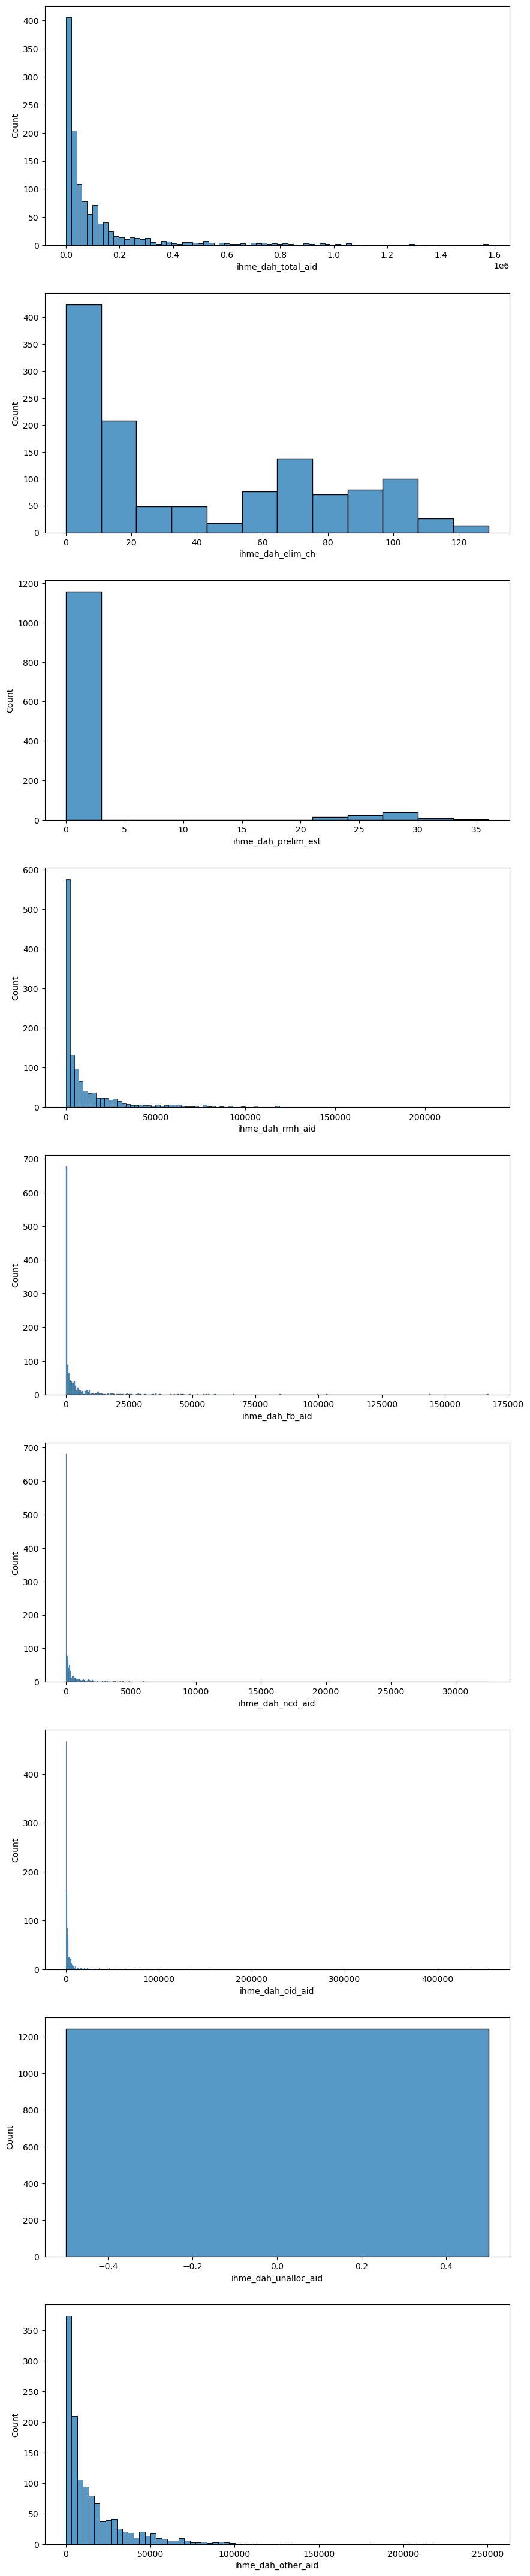

In [25]:
#create histograms for all mean variables
figure, axes = plt.subplots(9,1,figsize=(10,55))
sns.histplot(data_dah['ihme_dah_total_aid'],ax=axes[0])
sns.histplot(data_dah['ihme_dah_elim_ch'],ax=axes[1])
sns.histplot(data_dah['ihme_dah_prelim_est'],ax=axes[2])
sns.histplot(data_dah['ihme_dah_rmh_aid'],ax=axes[3])
sns.histplot(data_dah['ihme_dah_tb_aid'],ax=axes[4])
sns.histplot(data_dah['ihme_dah_ncd_aid'],ax=axes[5])
sns.histplot(data_dah['ihme_dah_oid_aid'],ax=axes[6])
sns.histplot(data_dah['ihme_dah_unalloc_aid'],ax=axes[7])
sns.histplot(data_dah['ihme_dah_other_aid'],ax=axes[8])
plt.savefig('dah1.png')

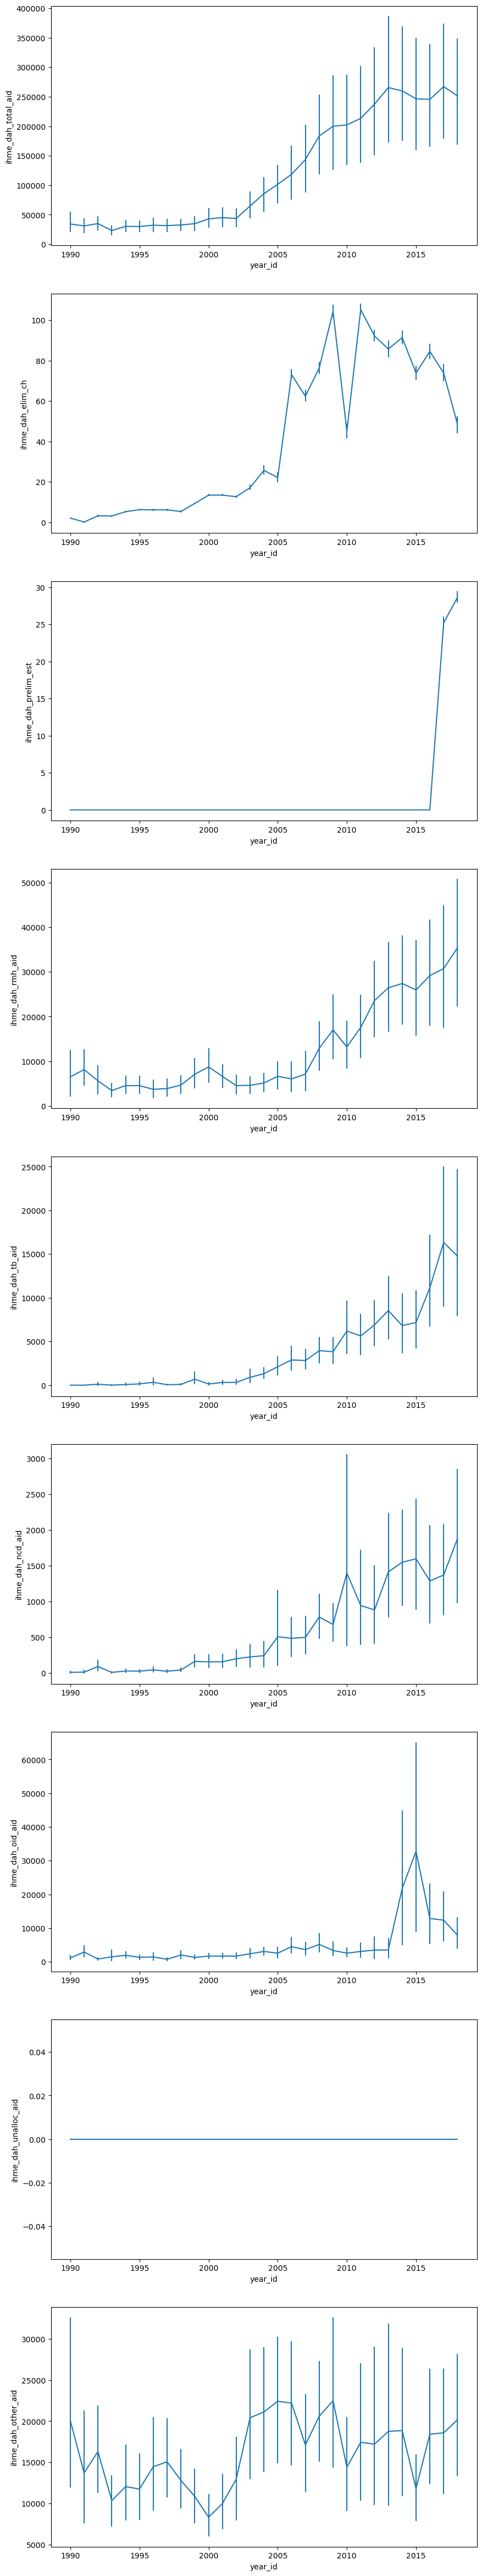

In [26]:
#create trendlines
figure, axes = plt.subplots(9,1,figsize=(10,60))
sns.lineplot(x='year_id',y='ihme_dah_total_aid',data=data_dah,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='ihme_dah_elim_ch',data=data_dah,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='ihme_dah_prelim_est',data=data_dah,err_style='bars',ax=axes[2])
sns.lineplot(x='year_id',y='ihme_dah_rmh_aid',data=data_dah,err_style='bars',ax=axes[3])
sns.lineplot(x='year_id',y='ihme_dah_tb_aid',data=data_dah,err_style='bars',ax=axes[4])
sns.lineplot(x='year_id',y='ihme_dah_ncd_aid',data=data_dah,err_style='bars',ax=axes[5])
sns.lineplot(x='year_id',y='ihme_dah_oid_aid',data=data_dah,err_style='bars',ax=axes[6])
sns.lineplot(x='year_id',y='ihme_dah_unalloc_aid',data=data_dah,err_style='bars',ax=axes[7])
sns.lineplot(x='year_id',y='ihme_dah_other_aid',data=data_dah,err_style='bars',ax=axes[8])

plt.savefig('dah2.png')

In [27]:
data_dah.to_csv('data_dah.csv')

## 3.  WASH, ND-GAIN country indicators

In [28]:
#load data
data_water = pd.read_csv('access_drink.csv')
data_sani = pd.read_csv('access_sani.csv')
display(data_water, data_sani)

,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,10.927531,10.927531,10.927531,10.927531,10.927531,10.927531,10.938792,11.725373,...,19.966875,20.818832,21.671018,22.523437,23.376206,24.229208,25.083892,25.940512,26.798956,27.588956
1,ALB,Albania,49.138321,49.138321,49.138321,49.138321,49.138321,49.138321,49.081199,48.984765,...,64.327401,66.380852,68.459832,70.563260,70.591971,70.616508,70.636942,70.653350,70.665854,70.674537
2,DZA,Algeria,70.078517,70.078517,70.078517,70.078517,70.078517,70.078517,70.642182,71.191853,...,75.469921,75.867626,76.250145,75.971789,75.534372,75.068531,74.574965,73.879833,73.139746,72.381456
3,AND,Andorra,90.640001,90.640001,90.640001,90.640001,90.640001,90.640001,90.639999,90.640002,...,90.639998,90.640003,90.639996,90.640001,90.639998,90.639996,90.639999,90.640001,90.640003,90.640003
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ISO3,Name,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,40.237416,40.237416,40.237416,40.237416,40.237416,40.237416,40.520895,40.808202,...,44.733594,45.154840,45.561574,45.954062,46.333013,46.698890,47.052290,47.393845,47.577141,47.691082
2,DZA,Algeria,21.514720,21.514720,21.514720,21.514720,21.514720,21.514720,21.351868,21.187954,...,19.677090,19.445413,19.214180,18.983353,18.753132,18.523473,18.294577,18.066395,17.839063,17.612590
3,AND,Andorra,14.604036,14.604036,14.604036,14.604036,14.604036,14.604036,21.788660,28.973285,...,93.634905,100.000004,99.999995,100.000001,99.999998,99.999995,99.999999,100.000001,100.000004,100.000004
4,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VEN,"Venezuela, Bolivarian Republic o",21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,21.810225,...,21.152327,21.365023,21.577719,21.790415,22.003111,22.215806,22.428502,22.641198,22.853894,23.066590
188,VNM,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,YEM,Yemen,24.771589,24.771589,24.771589,24.771589,24.771589,24.771589,24.890676,25.011545,...,19.724307,19.088029,18.448936,17.806700,17.431739,17.724536,18.011676,18.292967,18.568462,18.837979
190,ZMB,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#stack, filter and rename the columns
##rename
data_water = data_water.rename(columns= {'ISO3':'iso'})
data_sani = data_sani.rename(columns= {'ISO3':'iso'})
##filter the needed columns
data_sani = data_sani.drop(columns=['Name'])
data_water = data_water.drop(columns=['Name'])
##stack the individual year columns
data_water = data_water.melt(id_vars='iso',var_name='year_id',value_name='access_drinkwater_index')
data_sani = data_sani.melt(id_vars='iso',var_name='year_id',value_name='access_sani_index')

In [30]:
display(data_sani.dtypes, data_water.dtypes)
data_water['year_id'] = data_water['year_id'].astype(str).astype(int)
data_sani['year_id'] = data_sani['year_id'].astype(str).astype(int)

iso                   object
year_id               object
access_sani_index    float64
dtype: object

iso                         object
year_id                     object
access_drinkwater_index    float64
dtype: object

In [31]:
data_wash = pd.merge(data_water,data_sani, how="outer", on=["iso", "year_id"])

In [32]:
#create c_ids
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

data_wash = pd.DataFrame.cy.soft_validate_iso_year(data_wash, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_wash.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_wash = pd.DataFrame.cy.from_iso_year(data_wash[data_wash['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_wash = data_wash.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,iso,year_id,access_drinkwater_index,access_sani_index,valid_id
116,MNE,1995,83.869283,28.139766,False
151,SRB,1995,74.377059,22.767394,False
171,TLS,1995,NaN,NaN,False
308,MNE,1996,83.869283,28.139766,False
343,SRB,1996,74.377059,22.767394,False
363,TLS,1996,NaN,NaN,False
500,MNE,1997,83.869283,28.139766,False
535,SRB,1997,74.377059,22.767394,False
555,TLS,1997,NaN,NaN,False
692,MNE,1998,83.869283,28.139766,False


countries with cy_id na below


,iso,year_id,access_drinkwater_index,access_sani_index,valid_id
116,MNE,1995,83.869283,28.139766,False
151,SRB,1995,74.377059,22.767394,False
171,TLS,1995,NaN,NaN,False
308,MNE,1996,83.869283,28.139766,False
343,SRB,1996,74.377059,22.767394,False
363,TLS,1996,NaN,NaN,False
500,MNE,1997,83.869283,28.139766,False
535,SRB,1997,74.377059,22.767394,False
555,TLS,1997,NaN,NaN,False
692,MNE,1998,83.869283,28.139766,False


In [33]:
#group by country-year & only filter c_ids for  SSa
data_wash = data_wash.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')
data_wash = data_wash.groupby(['c_id','year_id']).sum().reset_index()
display(data_wash)

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_12381/3702523228.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_wash = data_wash.groupby(['c_id','year_id']).sum().reset_index()


,c_id,year_id,access_drinkwater_index,access_sani_index,valid_id
0,55,1995,0.0,24.851214,1
1,55,1996,0.0,24.851214,1
2,55,1997,0.0,24.851214,1
3,55,1998,0.0,24.851214,1
4,55,1999,0.0,24.851214,1
...,...,...,...,...,...
255,237,2016,0.0,0.000000,1
256,237,2017,0.0,0.000000,1
257,237,2018,0.0,0.000000,1
258,237,2019,0.0,0.000000,1


In [34]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_wash.columns:
    pct_missing= np.mean(data_wash[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,c_id,0.0
1,year_id,0.0
2,access_drinkwater_index,0.0
3,access_sani_index,0.0
4,valid_id,0.0


In [35]:
custom_describe(data_wash)

,c_id,year_id,access_drinkwater_index,access_sani_index,valid_id
nullcounts,0.0,0.0,0.000000,0.000000,0.0
sum,37648.0,521950.0,1538.790667,1775.763746,260.0
mean,144.8,2007.5,5.918426,6.829861,1.0
median,158.5,2007.5,0.000000,0.000000,1.0
max,237.0,2020.0,33.240516,37.080016,1.0


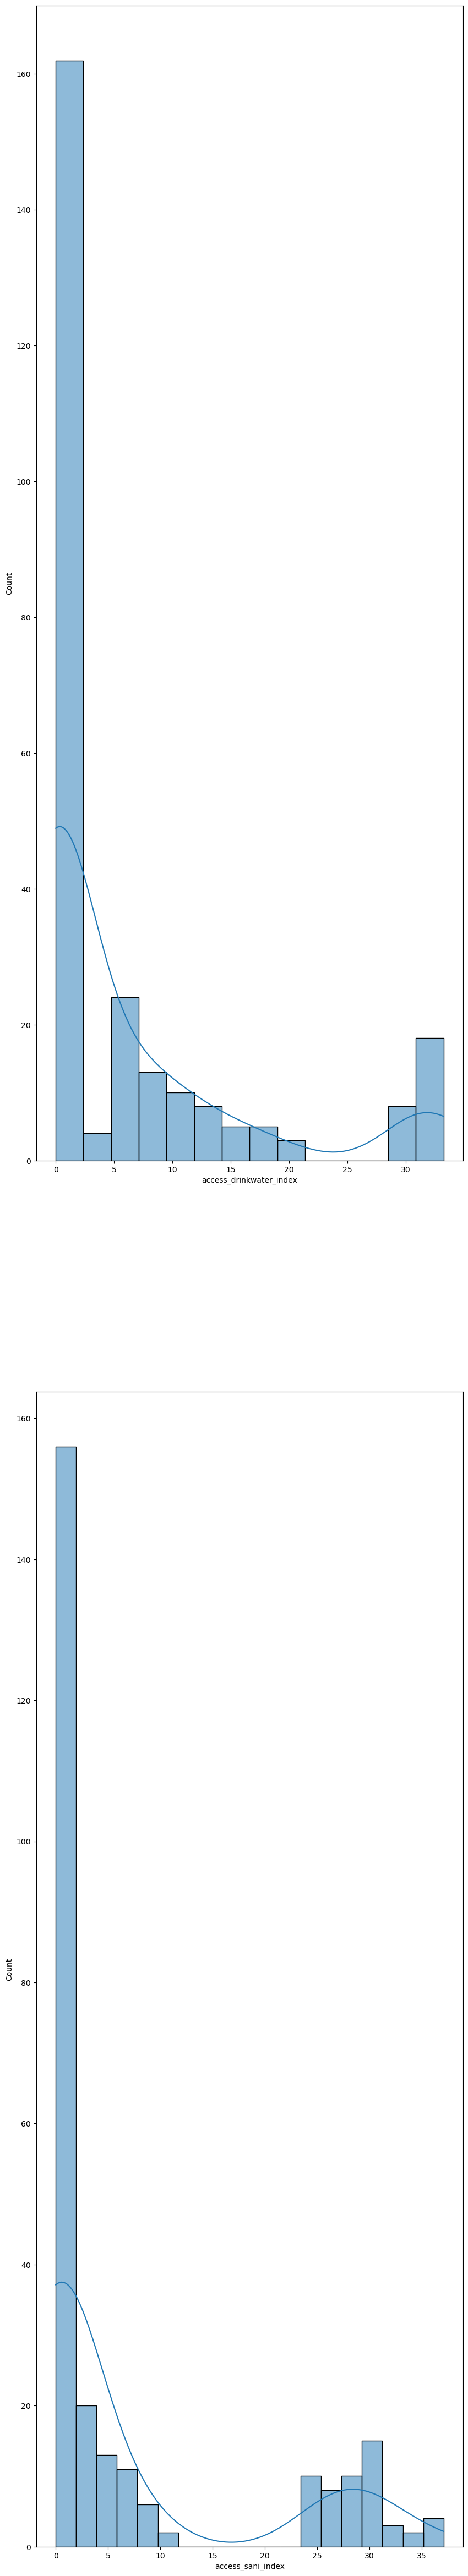

In [36]:
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.histplot(data_wash['access_drinkwater_index'],kde = True,ax=axes[0])
sns.histplot(data_wash['access_sani_index'],kde = True,ax=axes[1])

plt.savefig('wash1.png')

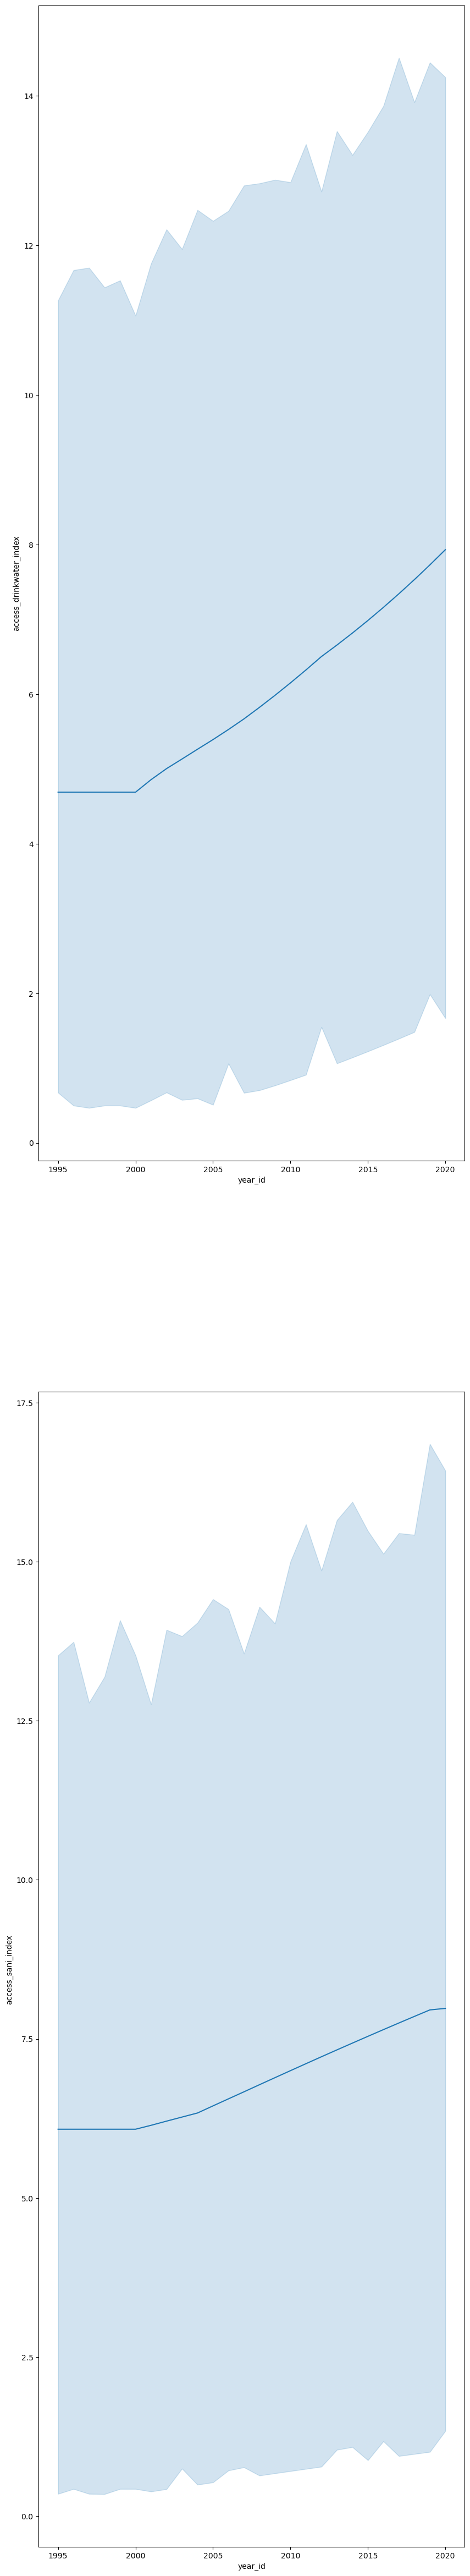

In [37]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))
sns.lineplot(x='year_id',y='access_drinkwater_index',data=data_wash,ax=axes[0])
sns.lineplot(x='year_id',y='access_sani_index',data=data_wash,ax=axes[1])

plt.savefig('wash2.png')

In [38]:
data_wash.to_csv('data_wash.csv')

## 4. Exposure and Vulnerability

In [39]:
def report(df):
    print()
    print(f"A dataset with {len(df.columns)} columns, with "
          f"data between t {min(df.index.get_level_values(0))} "
          f"and {max(df.index.get_level_values(0))}. "
          f"({len(np.unique(df.index.get_level_values(1)))} units)"
          )
    return

In [40]:
#look if the data is already in the views system
!viewser tables list


  > Tables
  ---------------------------------------------------------------------------------------
  | name                                    | path                                    |
  |:----------------------------------------|:----------------------------------------|
  | values_actor_pgm_actor_qlag2_tlag24     | values_actor_pgm_actor_qlag2_tlag24     |
  | values_actor_pgm_actor                  | values_actor_pgm_actor                  |
  | values_actor_pgm_actor_qlag1            | values_actor_pgm_actor_qlag1            |
  | values_actor_pgm_actor_qlag1_persistent | values_actor_pgm_actor_qlag1_persistent |
  | values_actor_pgm_actor_qlag1_tlag24     | values_actor_pgm_actor_qlag1_tlag24     |
  | values_actor_pgm_actor_qlag1_tlag6      | values_actor_pgm_actor_qlag1_tlag6      |
  | values_actor_pgm_actor_qlag2_persistent | values_actor_pgm_actor_qlag2_persistent |
  | values_actor_pgm_actor_persistent       | values_actor_pgm_actor_persistent       |
  | vdem_v12_healt

In [41]:
!viewser tables show gdis_pgy


  > Gdis_pgy
  -------------------------------------------------------------------------------
  | name                                | path                                |
  |:------------------------------------|:------------------------------------|
  | priogrid_year_id                    | priogrid_year_id                    |
  | gids_disastertype_join              | gids_disastertype_join              |
  | gids_total_deaths_mean              | gids_total_deaths_mean              |
  | gids_total_affected_mean            | gids_total_affected_mean            |
  | gids_no_injured_mean                | gids_no_injured_mean                |
  | gids_disasterno_nunique             | gids_disasterno_nunique             |
  | gids_disasterno_count               | gids_disasterno_count               |
  | gids_distype_drought_sum            | gids_distype_drought_sum            |
  | gids_distype_earthquake_sum         | gids_distype_earthquake_sum         |
  | gids_distype_extreme

In [42]:
#define the preliminers t (1990 till 2019) and c_ids
#transform pgy into cy
data_disaster = (Queryset("gdis_pgy", "priogrid_year")
                 .with_column(Column("gdis_count", from_table="gdis_pgy", from_column="gids_disasterno_count"))
                # .agggregate('sum')
                 .with_column(Column("gdis_nunique", from_table="gdis_pgy", from_column="gids_disasterno_nunique"))
                # .agggregate('sum')
                 .with_column(Column("gdis_type", from_table="gdis_pgy", from_column="gids_disastertype_join")))


data_disaster = data_disaster.publish().fetch()

data_disaster

 .    

gdis_count  gdis_nunique gdis_type
year_id priogrid_gid                                    
1980    49182                0.0           0.0          
        49183                0.0           0.0          
        49184                0.0           0.0          
        49185                0.0           0.0          
        49186                0.0           0.0          
...                          ...           ...       ...
2050    249340               NaN           NaN      None
        249341               NaN           NaN      None
        249342               NaN           NaN      None
        249343               NaN           NaN      None
        249344               NaN           NaN      None

[4602078 rows x 3 columns]

In [43]:
data_disaster= data_disaster.reset_index()
data_disaster = data_disaster.rename(columns={'priogrid_gid':'pg_id'})
data_disaster = data_disaster[data_disaster['year_id'] <=2019] 
data_disaster = data_disaster[data_disaster['year_id'] >=1990] 
data_disaster = data_disaster[(data_disaster.pgy.lon.between(-10,40)) & (data_disaster.pgy.lat.between(-35,+35))]
#filter in africa
data_disaster

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type
649526,1990,79599,0.0,0.0,
649527,1990,79600,0.0,0.0,
649528,1990,79601,0.0,0.0,
649610,1990,80317,1.0,1.0,drought
649611,1990,80318,1.0,1.0,drought
...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None
2558137,2019,179717,NaN,NaN,None
2558138,2019,179718,NaN,NaN,None
2558139,2019,179719,NaN,NaN,None


In [44]:
# Look how easy it is to convert a PGY df to a CY dataframe. Ready for aggregation!
data_disaster['c_id'] = data_disaster.pgy.c_id
data_disaster

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type,c_id
649526,1990,79599,0.0,0.0,,192
649527,1990,79600,0.0,0.0,,192
649528,1990,79601,0.0,0.0,,163
649610,1990,80317,1.0,1.0,drought,192
649611,1990,80318,1.0,1.0,drought,163
...,...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None,220
2558137,2019,179717,NaN,NaN,None,220
2558138,2019,179718,NaN,NaN,None,220
2558139,2019,179719,NaN,NaN,None,220


In [45]:
data_disaster

,year_id,pg_id,gdis_count,gdis_nunique,gdis_type,c_id
649526,1990,79599,0.0,0.0,,192
649527,1990,79600,0.0,0.0,,192
649528,1990,79601,0.0,0.0,,163
649610,1990,80317,1.0,1.0,drought,192
649611,1990,80318,1.0,1.0,drought,163
...,...,...,...,...,...,...
2558136,2019,179716,NaN,NaN,None,220
2558137,2019,179717,NaN,NaN,None,220
2558138,2019,179718,NaN,NaN,None,220
2558139,2019,179719,NaN,NaN,None,220


In [46]:
data_disaster = data_disaster.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')

In [48]:
#clean up columns
data_disaster = data_disaster.drop(columns={'pg_id'})

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


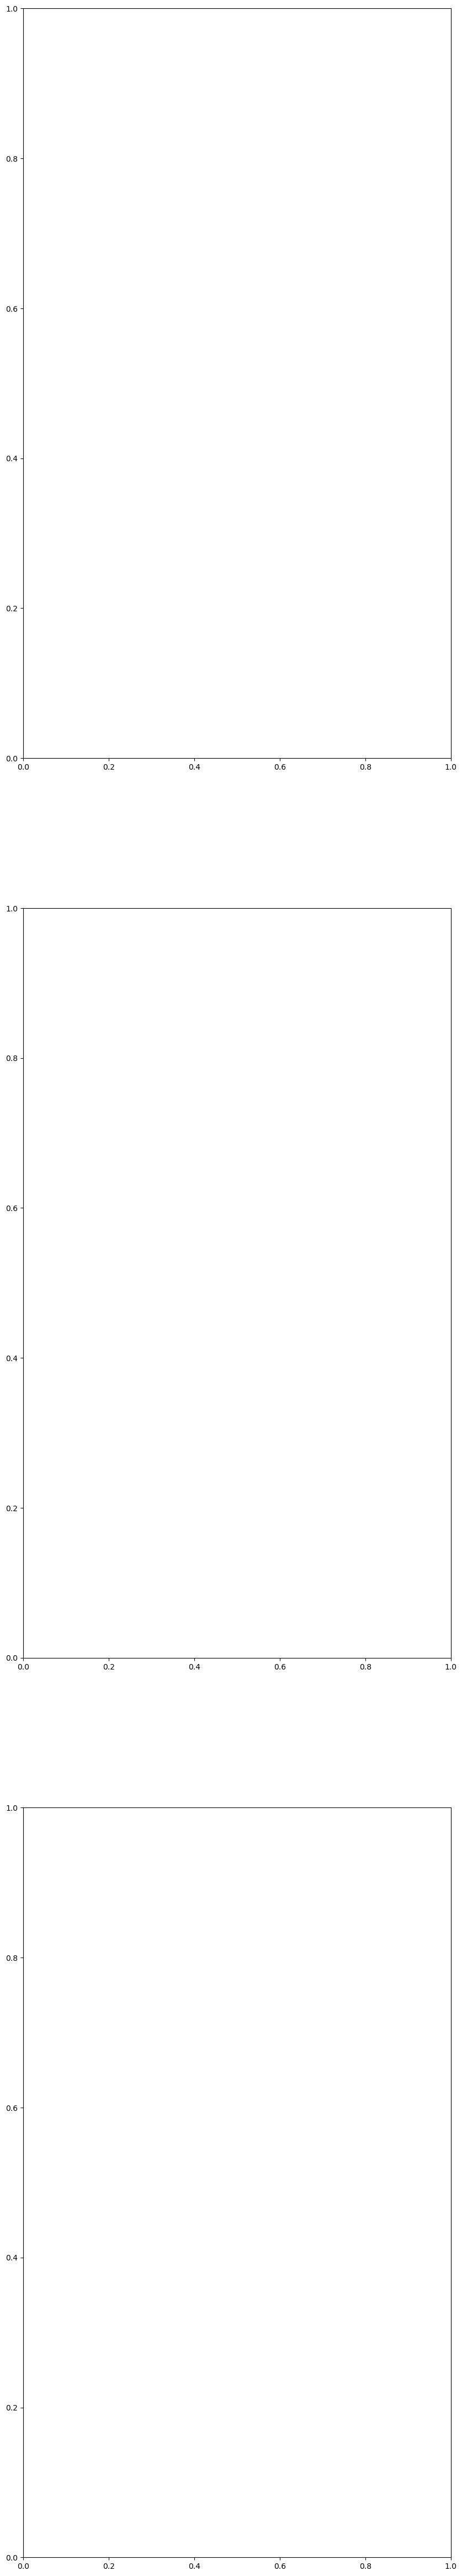

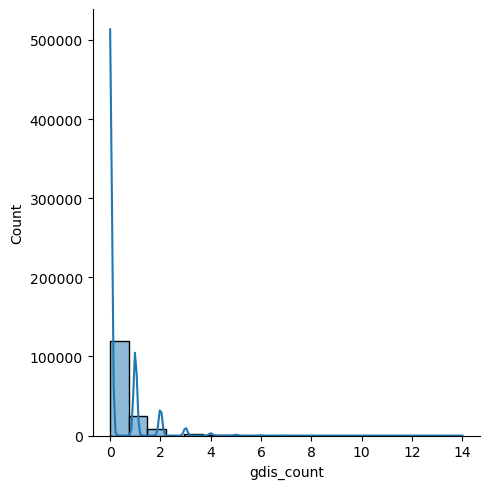

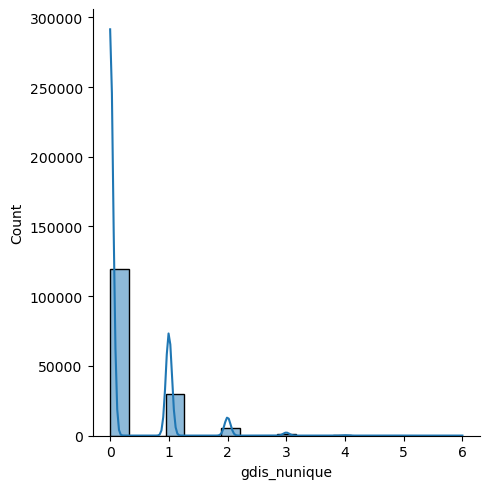

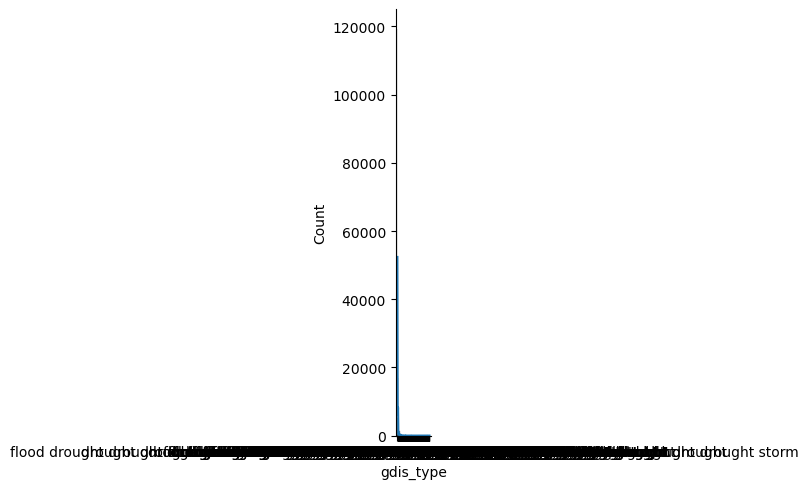

In [49]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(3,1,figsize=(10,60))
sns.displot(data_disaster['gdis_count'],kde=True,ax=axes[0])
sns.displot(data_disaster['gdis_nunique'],kde=True,ax=axes[1])
sns.displot(data_disaster['gdis_type'],kde=True,ax=axes[2])
plt.savefig('data_disaster1.png')

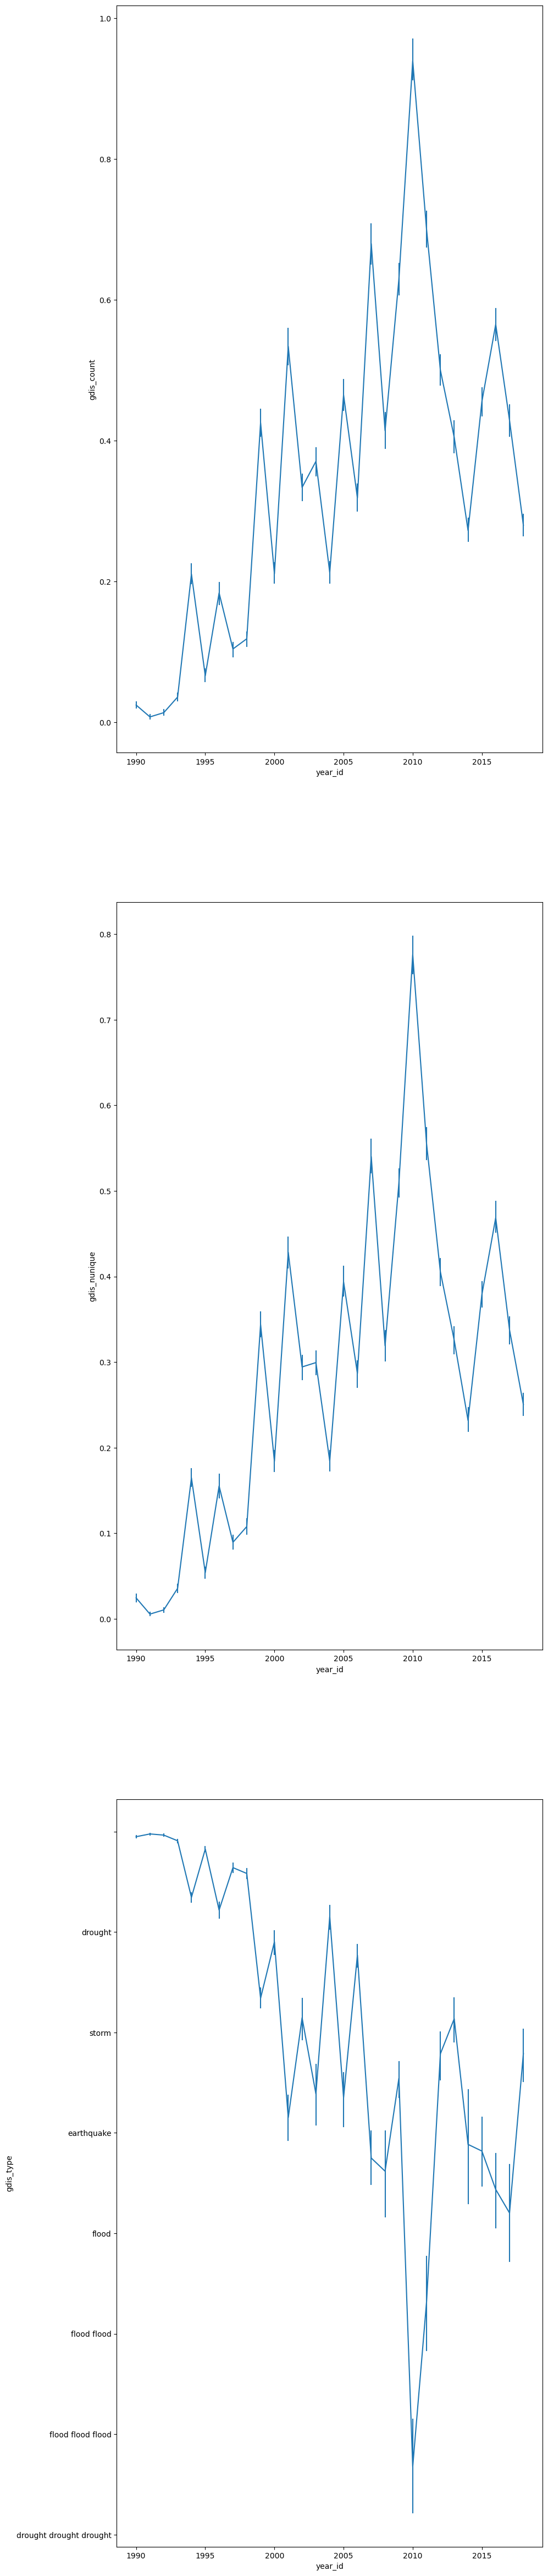

In [50]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='gdis_count',data=data_disaster,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='gdis_nunique',data=data_disaster,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='gdis_type',data=data_disaster,err_style='bars',ax=axes[2])
plt.savefig('data_disaster2.png')

In [51]:
data_disaster.to_csv('data_disaster.csv')

# emdat data for vulnerability

In [52]:
!viewser tables show emdat_cy


  > Emdat_cy
  ---------------------------------------------------------
  | name                     | path                     |
  |:-------------------------|:-------------------------|
  | country_year_id          | country_year_id          |
  | animal_sum               | animal_sum               |
  | drought_sum              | drought_sum              |
  | eartq_sum                | eartq_sum                |
  | epid_sum                 | epid_sum                 |
  | extrtemp_sum             | extrtemp_sum             |
  | flood_sum                | flood_sum                |
  | impact_sum               | impact_sum               |
  | insect_sum               | insect_sum               |
  | landsl_sum               | landsl_sum               |
  | massmov_sum              | massmov_sum              |
  | storm_sum                | storm_sum                |
  | volcan_sum               | volcan_sum               |
  | fire_sum                 | fire_sum                 

In [53]:
data_vn = (Queryset("emdat_cy", "country_year")
                 .with_column(Column("emdat_totl_vn", from_table="emdat_cy", from_column="tot_affected_sum"))
                 .with_column(Column("emdat_totl_dead", from_table="emdat_cy", from_column="tot_death"))
                 .with_column(Column("emdat_totl_injury", from_table="emdat_cy", from_column="tot_injured")))

data_vn = data_vn.publish().fetch()

data_vn

 .    

emdat_totl_vn  emdat_totl_dead  emdat_totl_injury
year_id country_id                                                   
1980    1                     0.0              0.0                  0
        2                     0.0              0.0                  0
        3                     0.0              0.0                  0
        4                     0.0              0.0                  0
        5                     0.0              0.0                  0
...                           ...              ...                ...
2050    242                   0.0              0.0                  0
        243                   0.0              0.0                  0
        244                   0.0              0.0                  0
        245                   0.0              0.0                  0
        246                   0.0              0.0                  0

[13510 rows x 3 columns]

In [54]:
data_vn = data_vn.reset_index()
#rename the columns
data_vn = data_vn.rename(columns={'country_id':'c_id'})
#fix the temporal scope
data_vn = data_vn[data_vn['year_id'] >=1990] 
data_vn = data_vn[data_vn['year_id'] <=2019] 

In [55]:
data_vn

,year_id,c_id,emdat_totl_vn,emdat_totl_dead,emdat_totl_injury
1689,1990,1,0.0,0.0,0
1690,1990,2,0.0,0.0,0
1691,1990,3,0.0,0.0,0
1692,1990,4,0.0,0.0,0
1693,1990,5,0.0,0.0,0
...,...,...,...,...,...
7460,2019,242,0.0,0.0,0
7461,2019,243,0.0,0.0,0
7462,2019,244,0.0,0.0,0
7463,2019,245,0.0,0.0,0


In [56]:
data_vn = data_vn.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')

/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/Users/NatStrom/opt/miniconda3/envs/viewser/lib/python3.9/site-packages/seaborn/distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


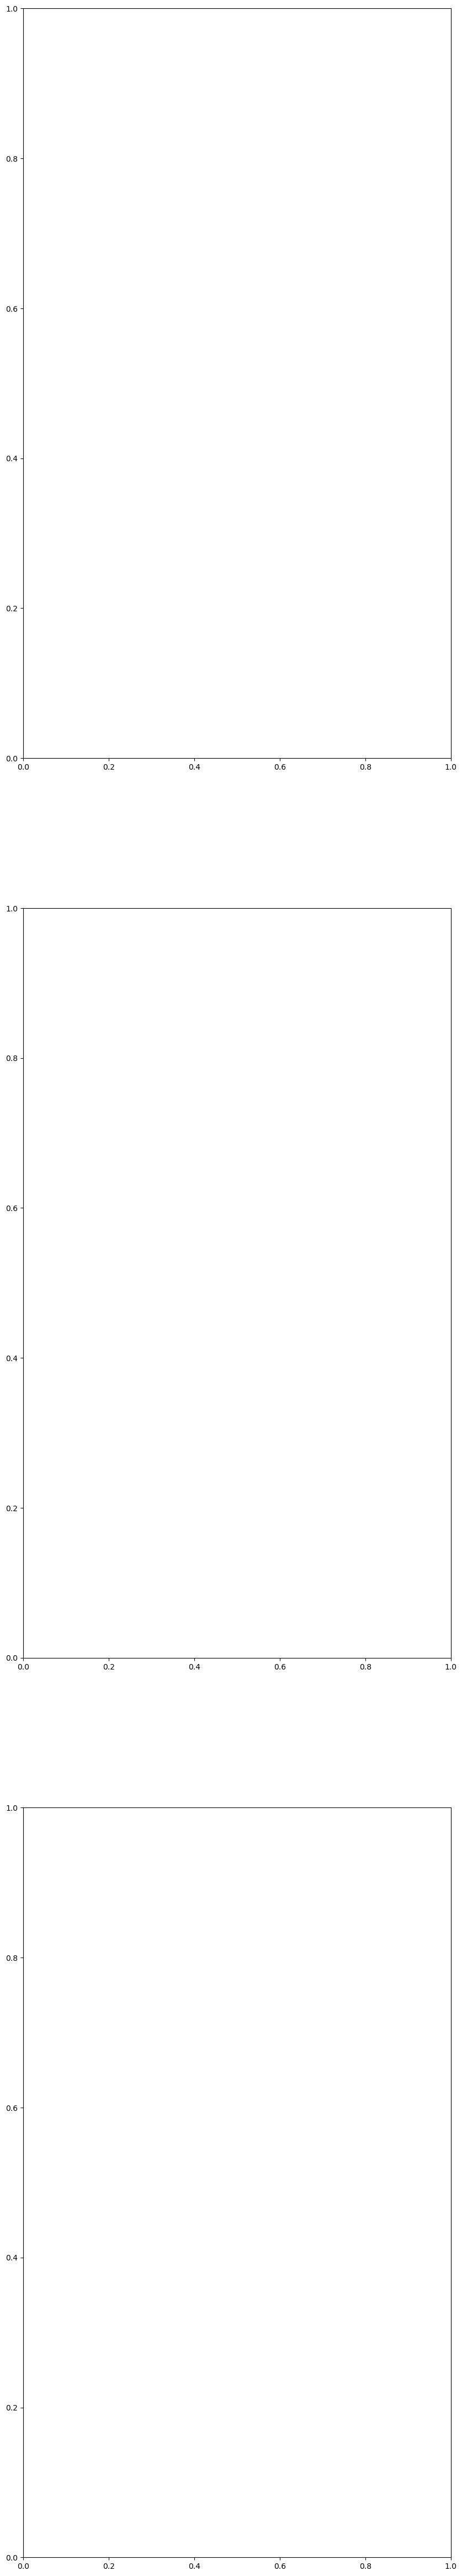

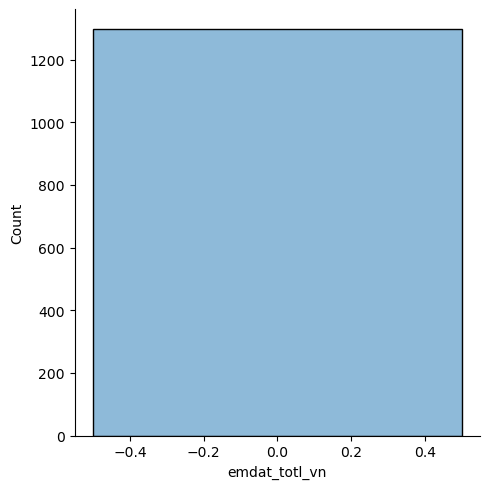

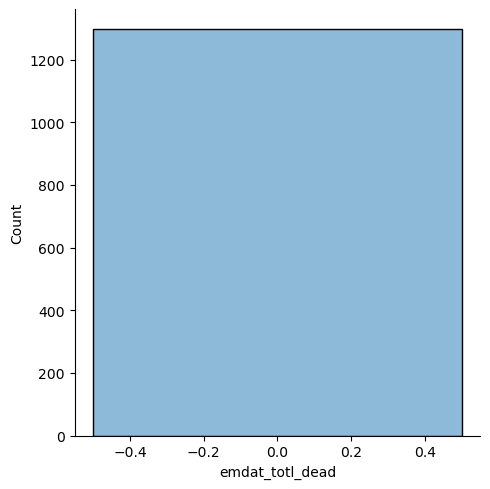

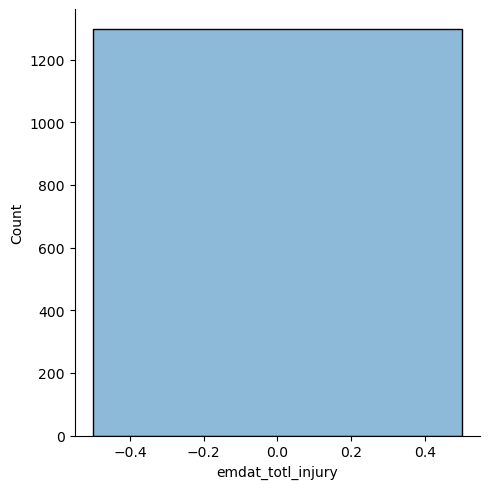

In [57]:
#example distribution plot with kernel densities
%matplotlib inline 
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.displot(data_vn['emdat_totl_vn'], kde=True, ax= axes[0])
sns.displot(data_vn['emdat_totl_dead'], kde=True, ax= axes[1])
sns.displot(data_vn['emdat_totl_injury'], kde=True, ax= axes[2])
plt.savefig('emdat1.png')

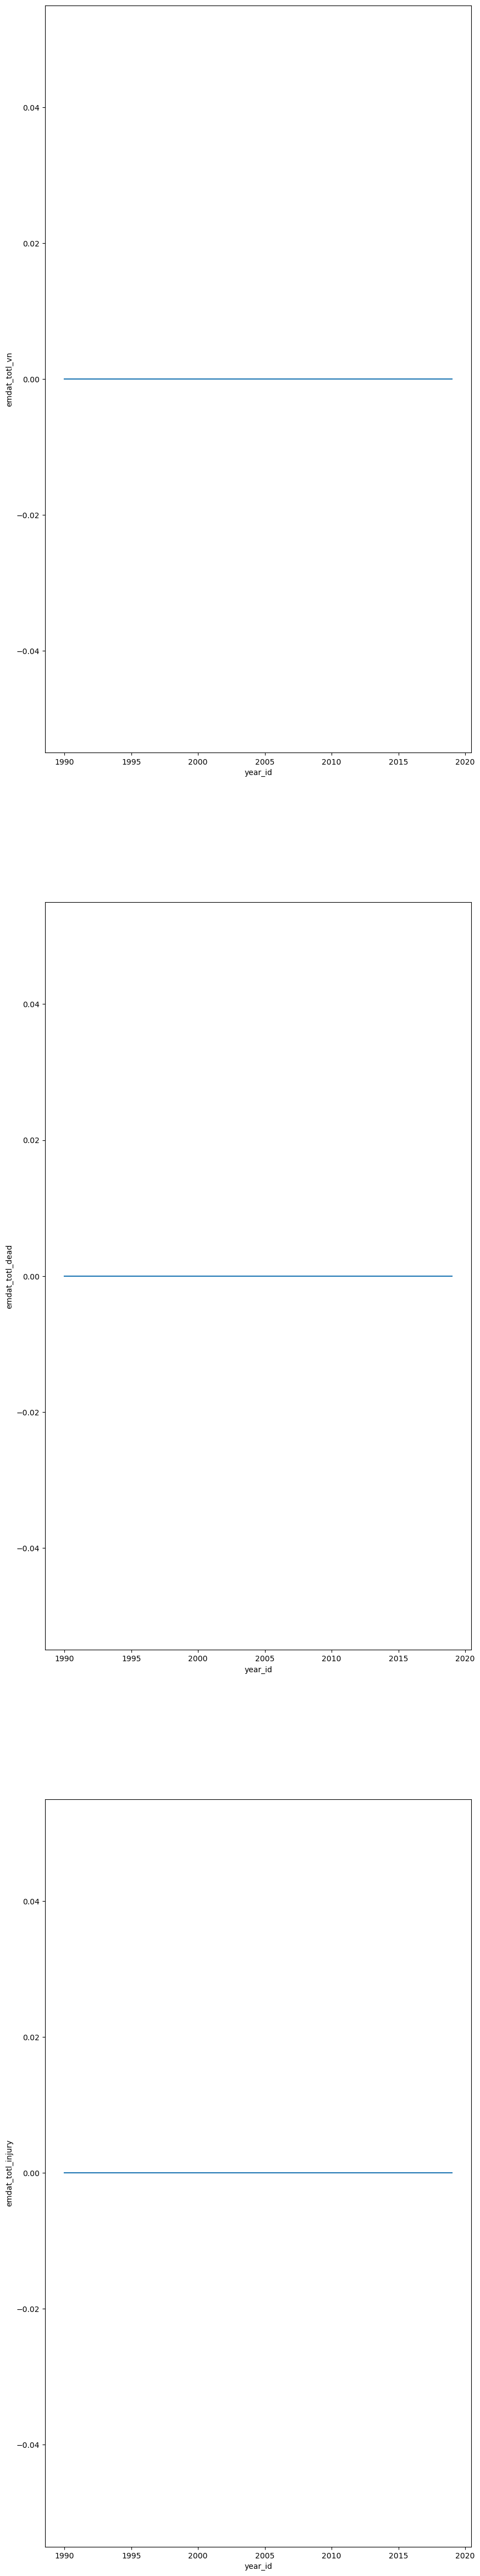

In [58]:
#create trendlines
figure, axes = plt.subplots(3,1,figsize=(10,60))

sns.lineplot(x='year_id',y='emdat_totl_vn',data=data_vn,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='emdat_totl_dead',data=data_vn,err_style='bars',ax=axes[1])
sns.lineplot(x='year_id',y='emdat_totl_injury',data=data_vn,err_style='bars',ax=axes[2])
plt.savefig('emdat2.pdf')

In [59]:
data_vn.to_csv('data_vn.csv')

# 6. Universal Health Care Coverage (UHC) 

In [21]:
data_uhc = pd.read_csv('who_uhc.csv')

In [22]:
print(data_uhc.dtypes)
print(data_uhc.columns)
print(data_uhc.describe(include='all'))

Unnamed: 0                             int64
who_iso3                              object
who_year_id                            int64
who_healthcare_coverage_index        float64
who_healthcare_availability_score    float64
dtype: object
Index(['Unnamed: 0', 'who_iso3', 'who_year_id',
       'who_healthcare_coverage_index', 'who_healthcare_availability_score'],
      dtype='object')
         Unnamed: 0 who_iso3  who_year_id  who_healthcare_coverage_index  \
count   1254.000000     1254  1254.000000                    1254.000000   
unique          NaN      209          NaN                            NaN   
top             NaN      142          NaN                            NaN   
freq            NaN        6          NaN                            NaN   
mean     626.500000      NaN  2011.000000                      57.612068   
std      362.142928      NaN     6.760408                      17.877693   
min        0.000000      NaN  2000.000000                      13.663830   
25%  

In [28]:
data_uhc = data_uhc.rename(columns={'who_iso3':'iso', 'who_year_id':'year_id','who_healthcare_coverage_index':'uhc_index', 
                            'who_healthcare_availability_score':'uhc_available_score'})

In [29]:
data_uhc

,Unnamed: 0,iso,year_id,uhc_index,uhc_available_score
0,0,142,2000,40.61875,40.61875
1,1,142,2005,46.79220,46.79220
2,2,142,2010,56.34250,56.34250
3,3,142,2015,63.23112,63.23112
4,4,142,2017,65.85437,65.85437
...,...,...,...,...,...
1249,1249,ZWE,2005,33.02815,33.02815
1250,1250,ZWE,2010,46.89234,46.89234
1251,1251,ZWE,2015,54.87214,54.87214
1252,1252,ZWE,2017,55.71077,55.71077


In [30]:
#create c_ids
from ingester3.scratch import cache_manager
cache_manager()
from ingester3.extensions import *

data_uhc = pd.DataFrame.cy.soft_validate_iso_year(data_uhc, iso_col='iso', year_col = 'year_id', at_month = 12)
inspect = data_uhc.query("valid_id == False")
print('countries with invalid id below')
display(inspect)

data_uhc = pd.DataFrame.cy.from_iso_year(data_uhc[data_uhc['valid_id']==True], iso_col = 'iso', year_col = 'year_id', at_month = 12)
data_uhc = data_uhc.c.db_id()
#inspect = data_DALY.loc[data_DALY.cy_id.isna()]
print('countries with cy_id na below')
display(inspect)

countries with invalid id below


,Unnamed: 0,iso,year_id,uhc_index,uhc_available_score,valid_id
0,0,142,2000,40.61875,40.61875,False
1,1,142,2005,46.79220,46.79220,False
2,2,142,2010,56.34250,56.34250,False
3,3,142,2015,63.23112,63.23112,False
4,4,142,2017,65.85437,65.85437,False
...,...,...,...,...,...,...
1219,1219,WPR,2005,59.54255,59.54255,False
1220,1220,WPR,2010,67.53893,67.53893,False
1221,1221,WPR,2015,75.17028,75.17028,False
1222,1222,WPR,2017,77.82727,77.82727,False


countries with cy_id na below


,Unnamed: 0,iso,year_id,uhc_index,uhc_available_score,valid_id
0,0,142,2000,40.61875,40.61875,False
1,1,142,2005,46.79220,46.79220,False
2,2,142,2010,56.34250,56.34250,False
3,3,142,2015,63.23112,63.23112,False
4,4,142,2017,65.85437,65.85437,False
...,...,...,...,...,...,...
1219,1219,WPR,2005,59.54255,59.54255,False
1220,1220,WPR,2010,67.53893,67.53893,False
1221,1221,WPR,2015,75.17028,75.17028,False
1222,1222,WPR,2017,77.82727,77.82727,False


In [31]:
data_uhc = data_uhc.query('c_id == 40 or c_id == 41 or c_id == 42 or c_id == 43 or c_id ==  47 or c_id ==  48 or c_id ==  49 or c_id ==  50 or c_id ==  52 or c_id ==  53 or c_id ==  54 or c_id ==  55 or c_id ==   56 or c_id ==   57 or c_id ==   69 or c_id ==   70 or c_id ==   74 or c_id ==   76 or c_id ==   78 or c_id ==   79 or c_id ==   80 or c_id ==   81 or c_id ==  120 or c_id ==  154 or c_id ==  155 or c_id ==  156 or c_id ==  157 or c_id ==  158 or c_id ==  159 or c_id ==  160 or c_id ==  161 or c_id ==  162 or c_id ==  163  or c_id ==  164or c_id ==   165 or c_id ==  166 or c_id ==  169 or c_id ==  170 or c_id ==  172 or c_id ==   191 or c_id ==  214 or c_id ==  235 or c_id ==  237 or c_id ==   244 or c_id ==  246')

In [39]:
data_uhc = data_uhc.drop(columns={'Unnamed: 0','valid_id'})
## only years from 1990 onwards
data_wdi = data_wdi.loc[data_wdi['year_id'] >= 1990]

In [36]:
custom_describe(data_uhc)

,year_id,uhc_index,uhc_available_score,c_id
nullcounts,0.000000,0.00000,0.00000,0.000000
sum,524889.000000,9835.74074,9835.74074,30348.000000
mean,2011.068966,37.68483,37.68483,116.275862
median,2015.000000,37.52629,37.52629,81.000000
max,2019.000000,69.40577,69.40577,246.000000


In [47]:
#test for missingness
#getting the % of missing values in each column
values_list = list()
cols_list = list() #creating empty lists

for col in data_uhc.columns:
    pct_missing= np.mean(data_uhc[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,iso,0.0
1,year_id,0.0
2,uhc_index,0.0
3,uhc_available_score,0.0
4,c_id,0.0


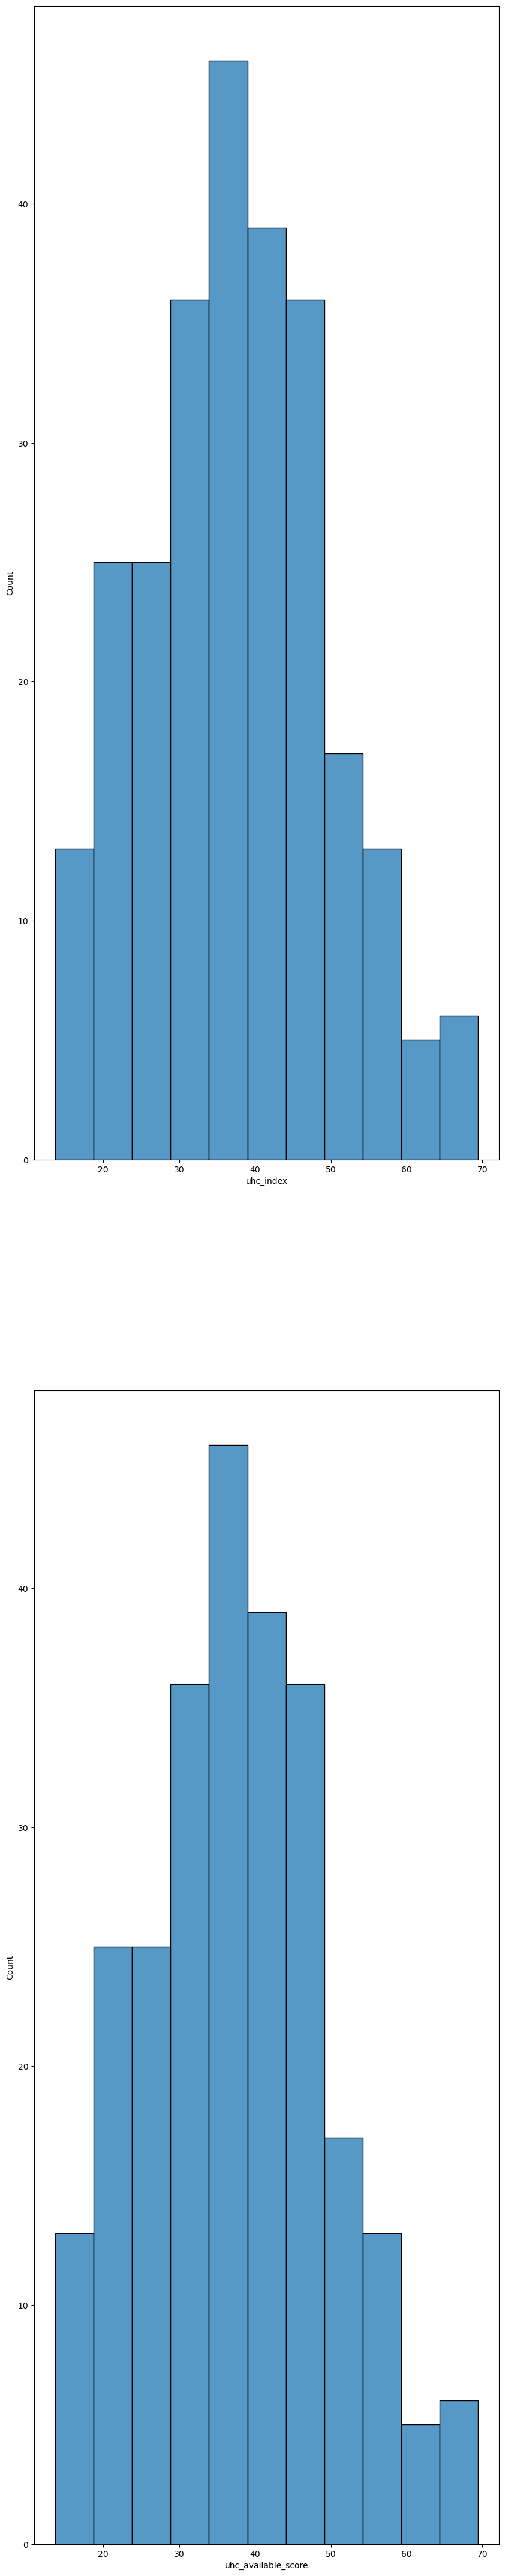

In [41]:
#get a histogram
#create histograms for all mean variables
figure, axes = plt.subplots(2,1,figsize=(10,55))
sns.histplot(data_uhc['uhc_index'],ax=axes[0])
sns.histplot(data_uhc['uhc_available_score'],ax=axes[1])

plt.savefig('uhc1.png')

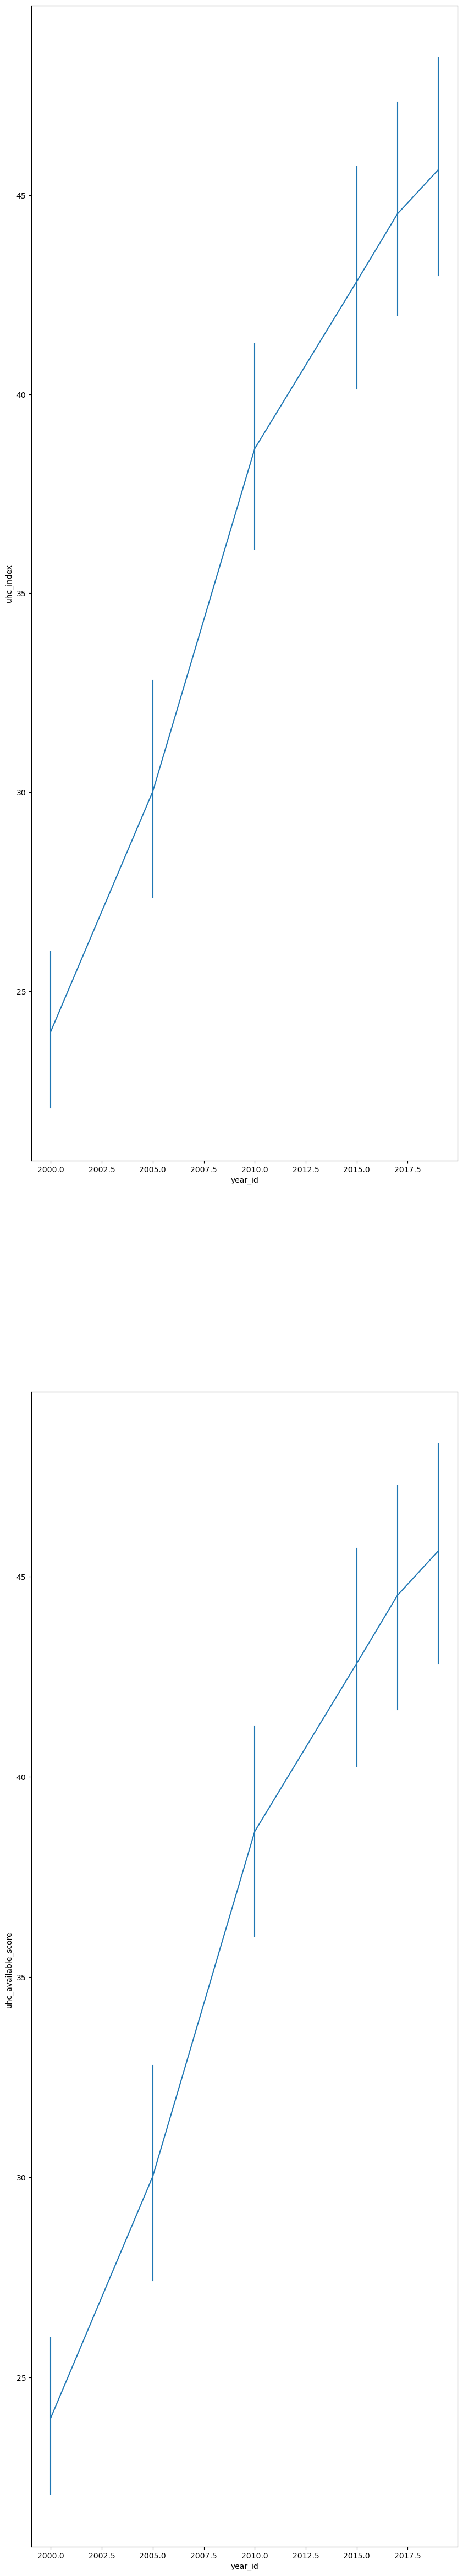

In [46]:
#create trendlines
figure, axes = plt.subplots(2,1,figsize=(10,60))

sns.lineplot(x='year_id',y='uhc_index',data=data_uhc,err_style='bars',ax=axes[0])
sns.lineplot(x='year_id',y='uhc_available_score',data=data_uhc,err_style='bars',ax=axes[1])

plt.savefig('uhc2.png')

In [45]:
data_uhc.groupby(['c_id','year_id']).sum().reset_index()

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_18856/3651274189.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_uhc.groupby(['c_id','year_id']).sum().reset_index()


,c_id,year_id,uhc_index,uhc_available_score
0,40,2000,35.42457,35.42457
1,40,2005,54.14250,54.14250
2,40,2010,62.24686,62.24686
3,40,2015,66.91813,66.91813
4,40,2017,67.72763,67.72763
...,...,...,...,...
256,244,2017,41.22448,41.22448
257,244,2019,39.57299,39.57299
258,246,2015,28.33845,28.33845
259,246,2017,31.03256,31.03256


In [48]:
#save to csv
data_uhc.to_csv('data_uhc.csv')